In [ ]:
import numpy as np
import pandas as pd
!pip install weightedstats
import weightedstats as ws
import matplotlib.pyplot as plt


from google.colab import files
uploaded = files.upload()

import io
df = pd.read_csv(io.BytesIO(uploaded['RA_21_22.csv']))
# df = pd.read_csv('/content/RA_21_22.csv')

In [ ]:
df.shape

(47776, 11)

In [ ]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47776 entries, 0 to 47775
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   weight         47776 non-null  float64
 1   year           47776 non-null  int64  
 2   age            47776 non-null  int64  
 3   sex            47776 non-null  object 
 4   education      47776 non-null  object 
 5   race           47776 non-null  object 
 6   asset_total    47776 non-null  float64
 7   asset_housing  47776 non-null  float64
 8   debt_total     47776 non-null  float64
 9   debt_housing   47776 non-null  float64
 10  income         47776 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.0+ MB


,weight,year,age,asset_total,asset_housing,debt_total,debt_housing,income
count,47776.000000,47776.000000,47776.000000,4.777600e+04,4.777600e+04,4.777600e+04,4.777600e+04,4.777600e+04
mean,4568.529699,2004.196542,50.963287,9.616921e+06,5.802055e+05,2.596873e+05,1.160737e+05,7.583277e+05
std,3085.808910,8.523680,16.220338,5.178782e+07,1.977056e+06,2.542978e+06,4.435621e+05,5.289845e+06
min,0.200000,1989.000000,17.000000,-2.248731e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2262.236877,1998.000000,39.000000,5.181932e+04,0.000000e+00,0.000000e+00,0.000000e+00,3.240437e+04
50%,4709.313953,2004.000000,50.000000,3.115228e+05,1.487704e+05,2.560519e+04,0.000000e+00,7.010760e+04
75%,6500.627949,2013.000000,63.000000,1.563578e+06,4.342556e+05,1.577590e+05,1.119516e+05,1.736499e+05
max,31115.820076,2016.000000,95.000000,2.928346e+09,1.826421e+08,2.934870e+08,4.482108e+07,3.519589e+08


In [ ]:
df.describe(include=object)

,sex,education,race
count,47776,47776,47776
unique,2,3,4
top,male,college degree,white
freq,37212,19444,37044


In [ ]:
df["race"].value_counts()

white       37044
black        5186
Hispanic     3553
other        1993
Name: race, dtype: int64

In [ ]:
df["education"].value_counts()

college degree    19444
no college        17820
some college      10512
Name: education, dtype: int64

In [ ]:
df["year"].value_counts()   #WHY?

2010    6482
2016    6248
2013    6015
2004    4519
2001    4442
2007    4417
1998    4305
1995    4299
1992    3906
1989    3143
Name: year, dtype: int64

In [ ]:
df["wealth_total"] = df.asset_total - df.debt_total
df["wealth_housing"] = df.asset_housing - df.debt_housing
df["wealth_Nhousing"] = df.wealth_total - df.wealth_housing

df

,weight,year,age,sex,education,race,asset_total,asset_housing,debt_total,debt_housing,income,wealth_total,wealth_housing,wealth_Nhousing
0,6859.959728,1989,35,female,no college,white,3731.72,0.00,1530.01,0.00,9737.17,2201.71,0.00,2201.71
1,7375.788638,1989,35,female,no college,black,0.00,0.00,0.00,0.00,11684.60,0.00,0.00,0.00
2,4193.294199,1989,40,male,no college,other,216439.77,139939.51,26681.80,18658.60,83739.63,189757.97,121280.91,68477.06
3,4743.208024,1989,51,female,no college,black,40060.02,18658.60,26383.26,5597.58,19474.33,13676.76,13061.02,615.74
4,5971.319496,1989,28,male,no college,black,35675.24,33585.48,27987.90,20524.46,35053.80,7687.34,13061.02,-5373.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47771,3033.103970,2016,43,male,some college,white,253300.00,0.00,96500.00,0.00,113415.28,156800.00,0.00,156800.00
47772,5721.988043,2016,67,male,some college,white,279400.00,120000.00,15000.00,0.00,109364.73,264400.00,120000.00,144400.00
47773,4824.390087,2016,60,male,college degree,white,1500.00,0.00,35000.00,0.00,40505.46,-33500.00,0.00,-33500.00
47774,4132.549093,2016,48,female,no college,white,4430.00,0.00,100.00,0.00,23290.64,4330.00,0.00,4330.00


In [ ]:
df.groupby(["year", "race", "education"])["asset_housing"].count()

year  race      education     
1989  Hispanic  college degree      11
                no college         117
                some college        34
      black     college degree      36
                no college         226
                                  ... 
2016  other     no college          67
                some college        60
      white     college degree    2188
                no college        1230
                some college      1063
Name: asset_housing, Length: 120, dtype: int64

In [ ]:
for x in range(1989, 2019, 3):
   print(ws.weighted_median(df.loc[df['year'] == x, 'wealth_Nhousing'], weights = df.loc[df['year'] == x, 'weight']))

29536.559999999998
27101.420000000013
34452.09
44442.26000000002
53381.130000000005
44130.84
46853.29000000002
33093.54
30417.579999999987
34300.0


**RACE AND EDUCATION** 

In [ ]:
#WHIES

In [ ]:
for x in range(1989, 2019, 3):
 print(ws.weighted_median(df.loc[(df['year'] == x) &
                          (df['race'] == 'white') & 
                          (df['education'] == 'college degree') , 
                          'wealth_total'], 
         weights = df.loc[(df['year'] == x) &
                          (df['race'] == 'white') & 
                          (df['education'] == 'college degree'), 'weight']))

272415.57
196435.03999999998
205538.08000000002
281591.06999999995
406455.31
387511.98
443334.47000000003
338893.8
379962.06000000006
393160.0


In [ ]:
for x in range(1989, 2019, 3):
 print(ws.weighted_median(df.loc[(df['year'] == x) &
                          (df['race'] == 'white') & 
                          (df['education'] == 'some college') , 
                          'wealth_total'], 
         weights = df.loc[(df['year'] == x) &
                          (df['race'] == 'white') & 
                          (df['education'] == 'some college'), 'weight']))

124602.13999999998
114476.70000000001
97922.2599999999
135948.66
162920.84000000003
125677.49000000002
149615.54
96605.73000000001
89613.30000000002
102930.0


In [ ]:
for x in range(1989, 2019, 3):
 print(ws.weighted_median(df.loc[(df['year'] == x) &
                          (df['race'] == 'white') & 
                          (df['education'] == 'no college') , 
                          'wealth_total'], 
         weights = df.loc[(df['year'] == x) &
                          (df['race'] == 'white') & 
                          (df['education'] == 'no college'), 'weight']))

100383.27
77614.73000000001
95369.67000000001
98708.11
103090.61
106766.1
112674.85999999999
76820.35
79085.73
94400.0


In [ ]:
#BLACKS

In [ ]:
for x in range(1989, 2019, 3):
 print(ws.weighted_median(df.loc[(df['year'] == x) &
                          (df['race'] == 'black') & 
                          (df['education'] == 'college degree') , 
                          'wealth_total'], 
         weights = df.loc[(df['year'] == x) &
                          (df['race'] == 'black') & 
                          (df['education'] == 'college degree'), 'weight']))

75492.70000000001
82344.06
46275.42999999999
112311.82999999999
125255.98000000001
113786.32999999999
86480.56
81783.28
35057.549999999996
68200.0


In [ ]:
for x in range(1989, 2019, 3):
 print(ws.weighted_median(df.loc[(df['year'] == x) &
                          (df['race'] == 'black') & 
                          (df['education'] == 'some college') , 
                          'wealth_total'], 
         weights = df.loc[(df['year'] == x) &
                          (df['race'] == 'black') & 
                          (df['education'] == 'some college'), 'weight']))

29200.710000000006
27822.569999999996
22080.660000000003
42655.469999999994
27503.47
31603.78
35087.86
12164.14
11032.819999999992
12500.0


In [ ]:
for x in range(1989, 2019, 3):
 print(ws.weighted_median(df.loc[(df['year'] == x) &
                          (df['race'] == 'black') & 
                          (df['education'] == 'no college') , 
                          'wealth_total'], 
         weights = df.loc[(df['year'] == x) &
                          (df['race'] == 'black') & 
                          (df['education'] == 'no college'), 'weight']))

4739.279999999999
5064.75
6968.72
13146.33
15038.849999999977
16215.22
9704.160000000003
11230.14
6805.290000000008
10010.0


In [ ]:
#HISPANICS

In [ ]:
for x in range(1989, 2019, 3):
 print(ws.weighted_median(df.loc[(df['year'] == x) &
                          (df['race'] == 'Hispanic') & 
                          (df['education'] == 'college degree') , 
                          'wealth_total'], 
         weights = df.loc[(df['year'] == x) &
                          (df['race'] == 'Hispanic') & 
                          (df['education'] == 'college degree'), 'weight']))

3358.5499999999993
57523.45999999999
94148.19
194332.52
158924.03
162660.91999999998
180592.44
67480.32
50111.689999999944
73910.0


In [ ]:
for x in range(1989, 2019, 3):
 print(ws.weighted_median(df.loc[(df['year'] == x) &
                          (df['race'] == 'Hispanic') & 
                          (df['education'] == 'some college') , 
                          'wealth_total'], 
         weights = df.loc[(df['year'] == x) &
                          (df['race'] == 'Hispanic') & 
                          (df['education'] == 'some college'), 'weight']))

54072.62999999999
10911.009999999998
29566.17
34673.25
19645.34
36245.79000000001
31382.209999999992
16248.330000000002
14095.2
21500.0


In [ ]:
for x in range(1989, 2019, 3):
 print(ws.weighted_median(df.loc[(df['year'] == x) &
                          (df['race'] == 'Hispanic') & 
                          (df['education'] == 'no college') , 
                          'wealth_total'], 
         weights = df.loc[(df['year'] == x) &
                          (df['race'] == 'Hispanic') & 
                          (df['education'] == 'no college'), 'weight']))

4683.3
7530.04
8769.62
11065.93
10161.380000000001
13709.810000000012
19547.29
13960.300000000001
11527.75
16800.0


**EDUCATION**

In [ ]:
for x in range(1989, 2019, 3):
 print(ws.weighted_median(df.loc[(df['year'] == x) &
                          (df['education'] == 'college degree') , 
                          'wealth_total'], 
         weights = df.loc[(df['year'] == x) &
                          (df['education'] == 'college degree'), 'weight']))

233419.10000000003
183052.03
191459.7
261155.99
347722.52
331426.39
375822.19999999995
276332.18999999994
291493.28
293500.0


In [ ]:
for x in range(1989, 2019, 3):
 print(ws.weighted_median(df.loc[(df['year'] == x) &
                          (df['education'] == 'some college') , 
                          'wealth_total'], 
         weights = df.loc[(df['year'] == x) &
                          (df['education'] == 'some college'), 'weight']))

87061.03
95173.63999999998
75794.61
113831.55000000002
116246.22000000002
97036.96000000002
109953.53000000001
64274.869999999995
51967.67999999999
66040.0


In [ ]:
for x in range(1989, 2019, 3):
 print(ws.weighted_median(df.loc[(df['year'] == x) &
                          (df['education'] == 'no college') , 
                          'wealth_total'], 
         weights = df.loc[(df['year'] == x) &
                          (df['education'] == 'no college'), 'weight']))

57655.07000000001
50109.130000000005
67651.39
61231.490000000005
63772.83
63334.75000000001
69110.34000000003
45810.350000000006
42027.82000000001
45030.0


In [ ]:
  
# Creating new dataframe
initial_data = {'year': [1989, 1992, 1995, 1998, 2001, 2004, 2007, 2010, 2013, 2016],
                'college_degree': [233419.10000000003, 183052.03
, 191459.7, 261155.99, 347722.52, 331426.39, 375822.19999999995, 276332.18999999994, 291493.28, 293500.0],
'some_college': [87061.03, 95173.63999999998
, 75794.61, 113831.55000000002, 116246.22000000002, 97036.96000000002, 109953.53000000001, 64274.869999999995, 51967.67999999999, 66040.0],
 'no_college': [57655.07000000001, 50109.130000000005
, 67651.39, 61231.490000000005, 63772.83, 63334.75000000001, 69110.34000000003, 45810.350000000006, 42027.82000000001, 45030.0]}
  
dfmed = pd.DataFrame(initial_data, columns = ['year', 'college_degree', 'some_college', 'no_college'])
  
# Generate result using pandas
dfmed



#dfmed["Result"] = A   

,year,college_degree,some_college,no_college
0,1989,233419.10,87061.03,57655.07
1,1992,183052.03,95173.64,50109.13
2,1995,191459.70,75794.61,67651.39
3,1998,261155.99,113831.55,61231.49
4,2001,347722.52,116246.22,63772.83
5,2004,331426.39,97036.96,63334.75
6,2007,375822.20,109953.53,69110.34
7,2010,276332.19,64274.87,45810.35
8,2013,291493.28,51967.68,42027.82
9,2016,293500.00,66040.00,45030.00


**RACE**

In [ ]:
for x in range(1989, 2019, 3):
 print(ws.weighted_median(df.loc[(df['year'] == x) &
                          (df['race'] == 'white'), 
                          'wealth_total'], 
         weights = df.loc[(df['year'] == x) &
                          (df['race'] == 'white'), 'weight']))

134901.68
113285.98
120582.34
143562.02999999997
169776.38
170100.84
188177.44
136508.10000000003
139817.79
166001.0


In [ ]:
for x in range(1989, 2019, 3):
 print(ws.weighted_median(df.loc[(df['year'] == x) &
                          (df['race'] == 'black'), 
                          'wealth_total'], 
         weights = df.loc[(df['year'] == x) &
                          (df['race'] == 'black'), 'weight']))

7836.62
17827.239999999998
18228.29
23754.870000000003
27503.47
26236.86
19802.06
17209.96
10785.350000000006
15650.0


In [ ]:
A = []
for x in range(1989, 2019, 3):
  value = ws.weighted_median(df.loc[(df['year'] == x) & 
                                    (df['race'] == 'Hispanic'), 
                                    'wealth_total'], 
                             weights = df.loc[(df['year'] == x) & 
                                              (df['race'] == 'Hispanic'), 
                                              'weight'])
  A.append(value)
print(A)

[7463.44, 10900.940000000002, 18933.0, 14415.22, 16258.21, 19509.14, 25499.48999999999, 16581.04, 14095.2, 21300.0]


In [ ]:
dfmed['white'] = [134901.68, 113285.98, 120582.34, 143562.02999999997, 169776.38, 170100.84, 188177.44, 136508.10000000003, 139817.79, 166001.0]
dfmed['black'] = [7836.62, 17827.239999999998, 18228.29, 23754.870000000003, 27503.47, 26236.86, 19802.06, 17209.96, 10785.350000000006, 15650.0]
dfmed['Hispanic'] = [7463.44, 10900.940000000002, 18933.0, 14415.22, 16258.21, 19509.14, 25499.48999999999, 16581.04, 14095.2, 21300.0]
dfmed['new'] = A

dfmed

,year,college_degree,some_college,no_college,white,black,Hispanic,new
0,1989,233419.10,87061.03,57655.07,134901.68,7836.62,7463.44,7463.44
1,1992,183052.03,95173.64,50109.13,113285.98,17827.24,10900.94,10900.94
2,1995,191459.70,75794.61,67651.39,120582.34,18228.29,18933.00,18933.00
3,1998,261155.99,113831.55,61231.49,143562.03,23754.87,14415.22,14415.22
4,2001,347722.52,116246.22,63772.83,169776.38,27503.47,16258.21,16258.21
5,2004,331426.39,97036.96,63334.75,170100.84,26236.86,19509.14,19509.14
6,2007,375822.20,109953.53,69110.34,188177.44,19802.06,25499.49,25499.49
7,2010,276332.19,64274.87,45810.35,136508.10,17209.96,16581.04,16581.04
8,2013,291493.28,51967.68,42027.82,139817.79,10785.35,14095.20,14095.20
9,2016,293500.00,66040.00,45030.00,166001.00,15650.00,21300.00,21300.00


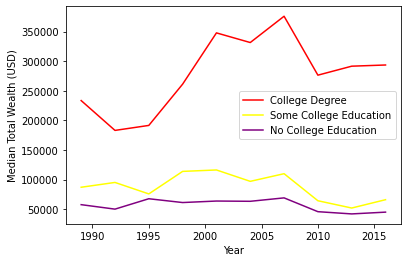

In [ ]:
fig, ax = plt.subplots()

ax.plot(dfmed['year'], dfmed['college_degree'], label = 'College Degree', color='red')
ax.plot(dfmed['year'], dfmed['some_college'], label = 'Some College Education', color='yellow')
ax.plot(dfmed['year'], dfmed['no_college'], label = 'No College Education', color='purple')

ax.set(xlabel='Year', ylabel='Median Total Wealth (USD)')

ax.legend()
plt.show()

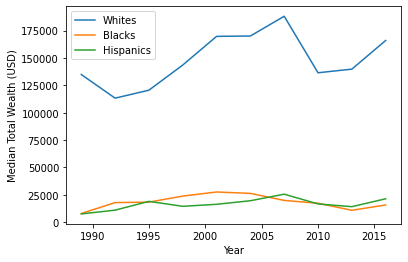

In [ ]:
fig, ax = plt.subplots()

ax.plot(dfmed['year'], dfmed['white'], label = 'Whites')
ax.plot(dfmed['year'], dfmed['black'], label = 'Blacks')
ax.plot(dfmed['year'], dfmed['Hispanic'], label = 'Hispanics')

ax.set(xlabel='Year', ylabel='Median Total Wealth (USD)')

ax.legend()
plt.show()


 **HOUSING WEALTH: BLACK VS WHITE**

In [ ]:
for x in range(1989, 2019, 3):
 print(ws.weighted_median(df.loc[(df['year'] == x) &
                          (df['race'] == 'white'), 
                          'wealth_housing'], 
         weights = df.loc[(df['year'] == x) &
                          (df['race'] == 'white'), 'weight']))

54109.94
46957.92
42282.12
49870.47
63678.0
69948.01000000001
78745.02
49739.79
48461.92
60000.0


In [ ]:
for x in range(1989, 2019, 3):
 print(ws.weighted_median(df.loc[(df['year'] == x) &
                          (df['race'] == 'black'), 
                          'wealth_housing'], 
         weights = df.loc[(df['year'] == x) &
                          (df['race'] == 'black'), 'weight']))

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [ ]:
dfmed['white_housing'] = [54109.94, 46957.92, 42282.12, 49870.47, 63678.0, 69948.01000000001, 78745.02, 49739.79, 48461.92, 60000.0]
dfmed['black_housing'] = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

dfmed

,year,college_degree,some_college,no_college,white,black,Hispanic,white_housing,black_housing
0,1989,233419.10,87061.03,57655.07,134901.68,7836.62,7463.44,54109.94,0
1,1992,183052.03,95173.64,50109.13,113285.98,17827.24,10900.94,46957.92,0
2,1995,191459.70,75794.61,67651.39,120582.34,18228.29,18933.00,42282.12,0
3,1998,261155.99,113831.55,61231.49,143562.03,23754.87,14415.22,49870.47,0
4,2001,347722.52,116246.22,63772.83,169776.38,27503.47,16258.21,63678.00,0
5,2004,331426.39,97036.96,63334.75,170100.84,26236.86,19509.14,69948.01,0
6,2007,375822.20,109953.53,69110.34,188177.44,19802.06,25499.49,78745.02,0
7,2010,276332.19,64274.87,45810.35,136508.10,17209.96,16581.04,49739.79,0
8,2013,291493.28,51967.68,42027.82,139817.79,10785.35,14095.20,48461.92,0
9,2016,293500.00,66040.00,45030.00,166001.00,15650.00,21300.00,60000.00,0


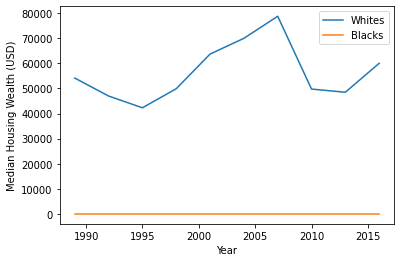

In [ ]:
fig, ax = plt.subplots()

ax.plot(dfmed['year'], dfmed['white_housing'], label = 'Whites')
ax.plot(dfmed['year'], dfmed['black_housing'], label = 'Blacks')

ax.set(xlabel='Year', ylabel='Median Housing Wealth (USD)')

ax.legend()
plt.show()

 **non-housing vs HOUSING WEALTH: BLACK VS WHITE 25+**

In [ ]:
for x in range(1989, 2019, 3):
 print(ws.weighted_median(df.loc[(df['year'] == x) &
                          (df['race'] == 'white') & 
                          (df['age'] > 24)  & 
                          (df['wealth_housing'] > 0), 
                          'wealth_housing'], 
         weights = df.loc[(df['year'] == x) &
                          (df['race'] == 'white') & 
                          (df['age'] > 24)  & 
                          (df['wealth_housing'] > 0), 'weight']))

102622.3
88884.63
86130.24
92953.83000000002
108388.08
120819.29
134329.74
110532.87
103110.47
118000.0


In [ ]:
dfmed['white_college'] = [272415.57, 196435.03999999998, 205538.08000000002, 281591.06999999995, 406455.31, 387511.98, 443334.47000000003, 338893.8, 379962.06000000006, 393160.0]
dfmed['white_some_college'] = [124602.13999999998, 114476.70000000001, 97922.2599999999, 135948.66, 162920.84000000003, 125677.49000000002, 149615.54, 96605.73000000001, 89613.30000000002, 102930.0]
dfmed['white_no_college'] = [100383.27, 77614.73000000001, 95369.67000000001, 98708.11, 103090.61, 106766.1, 112674.85999999999, 76820.35, 79085.73, 94400.0]

dfmed['black_college'] = [75492.70000000001, 82344.06, 46275.42999999999, 112311.82999999999, 125255.98000000001, 113786.32999999999, 86480.56, 81783.28, 35057.549999999996, 68200.0]
dfmed['black_some_college']=[29200.710000000006, 27822.569999999996, 22080.660000000003, 42655.469999999994, 27503.47, 31603.78, 35087.86, 12164.14, 11032.819999999992, 12500.0]
dfmed['black_no_college'] = [4739.279999999999, 5064.75, 6968.72, 13146.33, 15038.849999999977
, 16215.22, 9704.160000000003, 11230.14, 6805.290000000008, 10010.0]



dfmed

,year,college_degree,some_college,no_college,white,black,Hispanic,nnnew,new,white_college,white_some_college,white_no_college,black_college,black_some_college,black_no_college
0,1989,233419.10,87061.03,57655.07,134901.68,7836.62,7463.44,21300.0,21300.0,272415.57,124602.14,100383.27,75492.70,29200.71,4739.28
1,1992,183052.03,95173.64,50109.13,113285.98,17827.24,10900.94,21300.0,21300.0,196435.04,114476.70,77614.73,82344.06,27822.57,5064.75
2,1995,191459.70,75794.61,67651.39,120582.34,18228.29,18933.00,21300.0,21300.0,205538.08,97922.26,95369.67,46275.43,22080.66,6968.72
3,1998,261155.99,113831.55,61231.49,143562.03,23754.87,14415.22,21300.0,21300.0,281591.07,135948.66,98708.11,112311.83,42655.47,13146.33
4,2001,347722.52,116246.22,63772.83,169776.38,27503.47,16258.21,21300.0,21300.0,406455.31,162920.84,103090.61,125255.98,27503.47,15038.85
5,2004,331426.39,97036.96,63334.75,170100.84,26236.86,19509.14,21300.0,21300.0,387511.98,125677.49,106766.10,113786.33,31603.78,16215.22
6,2007,375822.20,109953.53,69110.34,188177.44,19802.06,25499.49,21300.0,21300.0,443334.47,149615.54,112674.86,86480.56,35087.86,9704.16
7,2010,276332.19,64274.87,45810.35,136508.10,17209.96,16581.04,21300.0,21300.0,338893.80,96605.73,76820.35,81783.28,12164.14,11230.14
8,2013,291493.28,51967.68,42027.82,139817.79,10785.35,14095.20,21300.0,21300.0,379962.06,89613.30,79085.73,35057.55,11032.82,6805.29
9,2016,293500.00,66040.00,45030.00,166001.00,15650.00,21300.00,21300.0,21300.0,393160.00,102930.00,94400.00,68200.00,12500.00,10010.00


In [ ]:
for x in range(1989, 2019, 3):
 print(ws.weighted_median(df.loc[(df['year'] == x) &
                          (df['race'] == 'black') & 
                          (df['age'] > 24)  & 
                          (df['wealth_housing'] > 0), 
                          'wealth_housing'], 
         weights = df.loc[(df['year'] == x) &
                          (df['race'] == 'black') & 
                          (df['age'] > 24)  & 
                          (df['wealth_housing'] > 0), 'weight']))

59707.52
55343.26
46980.130000000005
45739.18
52839.19
57230.19
69480.9
65214.40000000001
59804.07
62000.0


In [ ]:
for x in range(1989, 2019, 3):
 print(ws.weighted_median(df.loc[(df['year'] == x) &
                          (df['race'] == 'white') & 
                          (df['age'] > 24)  & 
                          (df['wealth_Nhousing'] > 0), 
                          'wealth_Nhousing'], 
         weights = df.loc[(df['year'] == x) &
                          (df['race'] == 'white') & 
                          (df['age'] > 24)  & 
                          (df['wealth_Nhousing'] > 0), 'weight']))

64931.92999999999
59871.350000000006
66367.27
95093.24
114484.91
103905.86
105414.11000000002
91742.28
99852.17
116300.0


In [ ]:
for x in range(1989, 2019, 3):
 print(ws.weighted_median(df.loc[(df['year'] == x) &
                          (df['race'] == 'black') & 
                          (df['age'] > 24)  & 
                          (df['wealth_Nhousing'] > 0), 
                          'wealth_Nhousing'], 
         weights = df.loc[(df['year'] == x) &
                          (df['race'] == 'black') & 
                          (df['age'] > 24)  & 
                          (df['wealth_Nhousing'] > 0), 'weight']))

11419.070000000007
13248.84
16881.520000000004
20981.01
25430.570000000007
19661.75
21203.25
18459.0
15879.01000000001
16530.0


**NEW DATA**

In [ ]:
dfmed['whitehosing25'] = [102622.3, 88884.63, 86130.24
, 92953.83000000002, 108388.08, 120819.29, 134329.74, 110532.87, 103110.47, 118000.0]
dfmed['blackhosing25'] = [59707.52, 55343.26, 46980.130000000005, 45739.18, 52839.19
, 57230.19, 69480.9, 65214.40000000001, 59804.07, 62000.0]
dfmed['whiteNhosing25'] = [64931.92999999999, 59871.350000000006
, 66367.27, 95093.24, 114484.91, 103905.86, 105414.11000000002, 91742.28, 99852.17, 116300.0
]
dfmed['blackNhosing25'] = [11419.070000000007, 13248.84, 16881.520000000004
, 20981.01, 25430.570000000007, 19661.75, 21203.25, 18459.0, 15879.01000000001
, 16530.0]

dfmed

,year,college_degree,some_college,no_college,white,black,Hispanic,white_housing,black_housing,whitehosing25,blackhosing25,whiteNhosing25,blackNhosing25
0,1989,233419.10,87061.03,57655.07,134901.68,7836.62,7463.44,54109.94,0,102622.30,59707.52,64931.93,11419.07
1,1992,183052.03,95173.64,50109.13,113285.98,17827.24,10900.94,46957.92,0,88884.63,55343.26,59871.35,13248.84
2,1995,191459.70,75794.61,67651.39,120582.34,18228.29,18933.00,42282.12,0,86130.24,46980.13,66367.27,16881.52
3,1998,261155.99,113831.55,61231.49,143562.03,23754.87,14415.22,49870.47,0,92953.83,45739.18,95093.24,20981.01
4,2001,347722.52,116246.22,63772.83,169776.38,27503.47,16258.21,63678.00,0,108388.08,52839.19,114484.91,25430.57
5,2004,331426.39,97036.96,63334.75,170100.84,26236.86,19509.14,69948.01,0,120819.29,57230.19,103905.86,19661.75
6,2007,375822.20,109953.53,69110.34,188177.44,19802.06,25499.49,78745.02,0,134329.74,69480.90,105414.11,21203.25
7,2010,276332.19,64274.87,45810.35,136508.10,17209.96,16581.04,49739.79,0,110532.87,65214.40,91742.28,18459.00
8,2013,291493.28,51967.68,42027.82,139817.79,10785.35,14095.20,48461.92,0,103110.47,59804.07,99852.17,15879.01
9,2016,293500.00,66040.00,45030.00,166001.00,15650.00,21300.00,60000.00,0,118000.00,62000.00,116300.00,16530.00


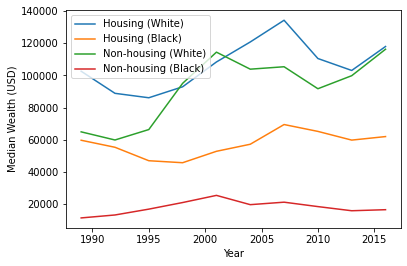

In [ ]:
fig, ax = plt.subplots()

ax.plot(dfmed['year'], dfmed['whitehosing25'], label = 'Housing (White)')
ax.plot(dfmed['year'], dfmed['blackhosing25'], label = 'Housing (Black)')
ax.plot(dfmed['year'], dfmed['whiteNhosing25'], label = 'Non-housing (White)')
ax.plot(dfmed['year'], dfmed['blackNhosing25'], label = 'Non-housing (Black)')


ax.set(xlabel='Year', ylabel='Median Wealth (USD)')

ax.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots()

ax.plot(range(len(centralityG14)), list(centralityG14.values()), label = '0.5')
plt.xticks(np.arange(min(range(len(centralityG14))), max(range(len(centralityG14)))+1, 1.0))

ax.set(xlabel='Node', ylabel='Katz Centrality')

ax.legend()
plt.show()